No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de regressão, classificação e regressão logística.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em python puro, Numpy, Keras e Tensorflow
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Como o Perceptron Aprende?](#Como-o-Perceptron-Aprende?)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from random import random
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.initializers import RandomUniform
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

Using TensorFlow backend.


# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. O Perceptron nada mais é que um  classificador/regressor linear responsável por mapear uma ou mais entradas em uma saída desejada. Além disso, o método de aprendizagem do Perceptron é adaptativo, ou seja, os melhores parâmetros são aprendidos utilizando algum método de minimização conhecido. Em geral, esse método é o _Gradiente Descendente_, mas outros métodos de minimização podem ser utilizados.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1 ... x_D$: representam os atributos dos seus dados com dimensionalidade D. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1 ... w_D)$. Em geral, também é alimentada por um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: inicialmente, o perceptron foi projetado para utilizar a função de ativação linear, ou seja, o resultado da junção aditiva representava a saída do Perceptron.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$y_{pred} = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x$: representa os atributos dos nossos dados que servem de entrada para o Perceptron.
- $w$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: função de ativação.
- $y_{pred}$: representa a saída do Perceptron (o valor predito).


## Como o Perceptron Aprende?

Se você já leu sobre o Perceptron antes, você provavelmente já viu que o modo como o perceptron aprende - isto é, a forma como os pesos são atualizados -, dá-se pela seguite fórmula:

$$w_i = w_i + \lambda(y_i - y_{pred})x_i$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Mas você já imaginou da onde vem essa fórmula? Em primeiro lugar, o método de atulização dos pesos é baseado no __Gradiente Descendente__. Sendo $\overrightarrow{w} = \{w_1, w_2, ..., w_D\}$, a atualização dos pesos é dados por:

$$\overrightarrow{w} = \overrightarrow{w} + \Delta{\overrightarrow{w}}$$

em que:

$$\Delta{\overrightarrow{w}} = \lambda\nabla E(\overrightarrow{w})$$

Sendo $\nabla E(\overrightarrow{w})$ o gradiente de uma função que depende de $\overrightarrow{w}$ e que queremos minimizar.

Agora, imagine que estamos utilizando um Perceptron para regressão, cuja função de custo geralmente é:

$$J(w) = \frac{1}{2}\sum_{i}^N (y_i - y_{pred_i})^2$$

Onde $N$ é a quantidade de amostras nos dados, e as demais variáveis representam as mesmas vistas anteriormente. Repare que a função de custo é quase uma _Mean Squared Error (MSE)_, só que ao invés de dividir por $N$, está se dividindo por 2 o resultado do somatório. O por quê disso será entendido mais a frente na demonstração.

Queremos encontrar o vetor $\overrightarrow{w}$ que minimiza a função $J$. Assim, temos:

$$\frac{\partial J}{\partial w_i} = \frac{\partial}{\partial w_i}\frac{1}{2}\sum_i^N (y_i - y_{pred_i})^2$$

Como a derivada do somatório é igual ao somatório das derivadas:

$$= \frac{1}{2}\sum_i^N \frac{\partial}{\partial w_i}(y_i - y_{pred_i})^2$$

Aplicando a regra da cadeia:

$$= \sum_i^N (y_i - y_{pred_i})\frac{\partial}{\partial w_i}(y_i - y_{pred_i})$$

Repare que, quando derivamos $(y_i - y_{pred_i})^2$, o expoente 2, ao sair do somatório, foi multiplicado por $\frac{1}{2}$, tornando-o 1. Isso é o que os matemáticos denominam de "conveniência matemática". 

Como $y_{pred_i} = x_iw_i + b$ é uma função que depende de $w$, e sua derivada em relação a $w_i$ é apenas $x_i$, temos que:

$$\frac{\partial J}{\partial w_i} = \sum_i^N (y_i - y_{pred_i})(-x_i)$$
$$\frac{\partial J}{\partial w_i} = -\sum_i^N (y_i - y_{pred_i})x_i$$

Na forma vetorizada, essa equação torna-se:

$$\frac{\partial J}{\partial \overrightarrow{w}} = -(\overrightarrow{y} - \overrightarrow{y}_{pred})\overrightarrow{x}$$

Como o gradiente nos dá a direção que a função cresce, e queremos minimizar a função, podemos remover o sinal de menos em frente ao resultado. Logo, chegamos que a atualização dos pesos pelo perceptron é dada por $w_i = w_i + \lambda(y_i - y_{pred})x_i$.

# Regressão 

In [2]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


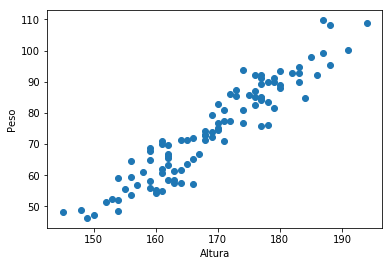

In [3]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [4]:
print(x.shape, y.shape)

(100,) (100,)


In [5]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100, 1)


### Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [6]:
D = x.shape[1]
w = 2*random() - 1 # [1xD]
b = 2*random() - 1 # [1x1]

for step in range(10001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = x_i*w + b
        error = y_i[0] - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

step 0: [ 10459.64251388]
step 1000: [-11.04963054]
step 2000: [-4.63692144]
step 3000: [-1.94586058]
step 4000: [-0.81657053]
step 5000: [-0.34266968]
step 6000: [-0.1437996]
step 7000: [-0.06034477]
step 8000: [-0.02532338]
step 9000: [-0.01062683]
step 10000: [-0.00445949]
w:  [ 1.36968167]
b:  [-157.86172478]


### Numpy 

In [7]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

for step in range(10001):
    y_pred = np.dot(x, w.T) + b # [100x1] x [1x1] + [1,1] = [100x1]
    error = y - y_pred # [100x1] - [100x1] = [100x1]
    w = w + 1e-7*np.dot(error.T, x) # [1x1] + [1x100]x[100x1] = [1,1]
    b = b + 1e-2*np.sum(error) 
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print('w: ', w)
print('b: ', b)

step 0: -630.42760
step 1000: -5.53593
step 2000: -2.31151
step 3000: -0.96516
step 4000: -0.40300
step 5000: -0.16827
step 6000: -0.07026
step 7000: -0.02934
step 8000: -0.01225
step 9000: -0.00511
step 10000: -0.00214
w:  [[ 1.37135131]]
b:  -157.447736553


### Numpy com Pré-processamento

In [8]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [9]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[ 33.60164767]]
b:  [ 74.99636287]


In [10]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1e-3

for step in range(1001):
    y_pred = np.dot(x, w.T) + b # [100x1] x [1x1] + [1,1] = [100x1]
    error = y - y_pred # [100x1] - [100x1] = [100x1]
    w = w + learning_rate*np.dot(error.T, x) # [1x1] + [1x100]x[100x1] = [1,1]
    b = b + learning_rate*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1:.5f}'.format(step, np.sum(error)))
    
print('w: ', w)
print('b: ', b)

step 0: 7464.34767
step 1000: 0.00000
w:  [[ 33.60164745]]
b:  74.9963628642


### Keras 

In [11]:
D = x.shape[1]

model = Sequential()
model.add(Dense(units=1, activation='linear', input_shape=(D,)))
model.compile(loss='mse', optimizer='sgd')

In [13]:
model.fit(x, y, batch_size=x.shape[0], epochs=2000, verbose=0)
error = model.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model.get_weights()

print('erro: ', error)
print('w: ', w)
print('b: ', b)

erro:  26.0829143524
w:  [[ 33.60111618]]
b:  [ 74.99616241]


### TensorFlow 

In [14]:
D = x.shape[1]

learning_rate = 1e-3
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y, dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_x, tf_w, transpose_b=True), tf_b)
    error = tf.subtract(tf_y, y_pred)
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x, transpose_a=True)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

In [15]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(1001):
        erro, _, _ = sess.run([loss, train_w, train_b])

        if step%1000 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print('erro: ', erro)
    print('w: ', tf_w.eval())
    print('b: ', tf_b.eval())

step 0: 7334.663303320418
step 1000: 1.097938309158053e-07
erro:  1.09793830916e-07
w:  [[ 33.60164744]]
b:  [ 74.99636286]


## Exercício de Regressão

In [2]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


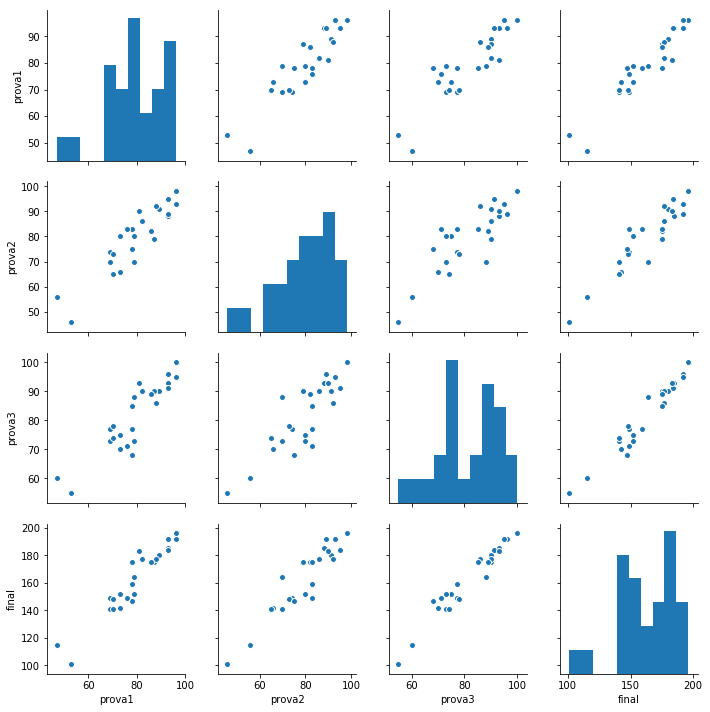

In [17]:
sb.pairplot(df)

In [3]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [4]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [20]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[  8.72048636  14.1054877   26.26749487]]
b:  [ 150.65175754]


### Python

In [21]:
D = x.shape[1]
w = [2*random() - 1 for d in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(2001):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

step 0: 3523.0133303106536
step 1000: 0.0020478637746350614
step 2000: 1.0761046979723687e-05
w:  [8.7251761304622892, 14.139500961161572, 26.320518571116779]
b:  150.711194543


### Numpy

In [22]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(2001):
    y_pred = np.dot(x, w.T) + b 
    error = y - y_pred
    w = w + learning_rate*np.dot(error.T, x)
    b = b + learning_rate*np.sum(error)
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, np.sum(error)))
    
print('w: ', w)
print('b: ', b)

step 0: 4048.3953437672694
step 1000: 0.0021329763967514737
step 2000: 1.1624888429651037e-05
w:  [[  8.72089427  14.10522464  26.26733878]]
b:  150.651734834


### Keras

In [5]:
D = x.shape[1]

model2 = Sequential()
model2.add(Dense(units=1, activation='linear', input_shape=(D,)))
model2.compile(loss='mse', optimizer='sgd')

In [8]:
model2.fit(x, y, batch_size=x.shape[0], epochs=5000, verbose=0)
error = model2.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model2.get_weights()

print('erro: ', error)
print('w: ', w)
print('b: ', b)

erro:  5.73896503448
w:  [[  8.91217613]
 [ 13.99333954]
 [ 26.18382835]]
b:  [ 150.63945007]


### Tensorflow

In [13]:
D = x.shape[1]

learning_rate = 1e-2
tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y, dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_x, tf_w, transpose_b=True), tf_b)
    error = tf.subtract(tf_y, y_pred)
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x, transpose_a=True)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

In [14]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        erro, _, _ = sess.run([loss, train_w, train_b])

        if step%1000 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print('erro: ', erro)
    print('w: ', tf_w.eval())
    print('b: ', tf_b.eval())

step 0: 4042.8026302512676
step 1000: 0.0022791759706990433
step 2000: 1.2541378552555216e-05
erro:  1.25413785526e-05
w:  [[  8.72092649  14.10520385  26.26732646]]
b:  [ 150.65173304]


# Classificação

Para transformar o Perceptron em um classificador binário, temos que fazer uma pequena modificação no cálculo da saída:

$$y_{pred} = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

## Porta AND/OR

In [15]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([[0, 0, 0, 1]]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4, 1)


### Python

In [16]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(101):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: -3
step 10: -2
step 20: -2
step 30: -1
step 40: -1
step 50: -1
step 60: 0
step 70: 0
step 80: -1
step 90: 0
step 100: 0
w:  [-0.046098392220529458, 0.23060703666107418]
b:  -0.163032731795
y_pred: [-0.16303273  0.0675743  -0.20913112  0.02147591]


### Numpy

In [17]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(100):
    y_pred = np.dot(x, w.T) + b 
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y - y_pred
    w = w + learning_rate*np.dot(error.T, x)
    b = b + learning_rate*np.sum(error)
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, np.sum(error)))
    
print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

step 0: -1
step 10: 0
step 20: 0
step 30: 0
step 40: -1
step 50: 0
step 60: -1
step 70: 0
step 80: 0
step 90: 0
w:  [[ 0.00503835  0.1525492 ]]
b:  -0.154296345952
y_pred: [[-0.15429635 -0.00174715 -0.149258    0.0032912 ]]


### Keras

In [5]:
D = x.shape[1]

model3 = Sequential()
model3.add(Dense(units=1, activation='linear', input_dim=D))
model3.compile(loss='categorical_hinge', optimizer='sgd')

In [6]:
model3.fit(x, y, epochs=1000, batch_size=x.shape[0], verbose=0)
y_pred = model3.predict(x, verbose=0)
error = model3.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model3.get_weights()
print(error)
print(w,b)
print(y_pred)

0.247494459152
[[ 1.0107615 ]
 [ 1.01249075]] [-2.01002216]
[[-2.01002216]
 [-0.99753141]
 [-0.99926066]
 [ 0.01323009]]


### TensorFlow

In [18]:
D = x.shape[1]

learning_rate = 1e-2

tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y, dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_x, tf_w, transpose_b=True), tf_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    error = tf.subtract(tf_y, y_pred_bin)
    
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x, transpose_a=True)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

In [19]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(101):
        erro, _, _ = sess.run([loss, train_w, train_b])
        
        if step%10 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print('erro: ', erro)
    print('w: ', tf_w.eval())
    print('b: ', tf_b.eval())

step 0: -2.0
step 10: -2.0
step 20: -1.0
step 30: 0.0
step 40: 0.0
step 50: 0.0
step 60: 0.0
step 70: 0.0
step 80: 0.0
step 90: 0.0
step 100: 0.0
erro:  0.0
w:  [[ 0.56880917  0.52671275]]
b:  [-0.58545519]


## Exercício de Classificação

(100, 2) (100, 1)


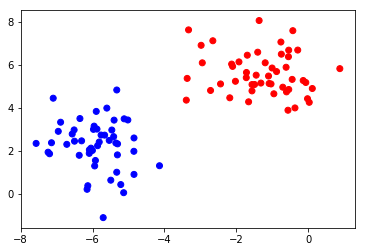

In [21]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

In [22]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

    y_mesh = np.dot(x_mesh, w.T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step 0: -7
step 5: 0
step 10: 0
step 15: 0
step 20: 0
step 25: 0
step 30: 0
step 35: 0
step 40: 0
step 45: 0
step 50: 0
w:  [0.37935682131197879, 0.50329466115944377]
b:  -0.547215090889


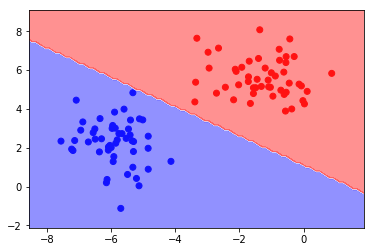

In [24]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(51):
    sum_error = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        sum_error += error
        
    if step%5 == 0:
        print('step {0}: {1}'.format(step, sum_error))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, np.array(w), b)

### Numpy

step 0: -49
step 10: 0
step 20: 0
step 30: 0
step 40: 0
step 50: 0
w:  [[ 2.11824411  2.32020015]]
b:  -0.304002426237


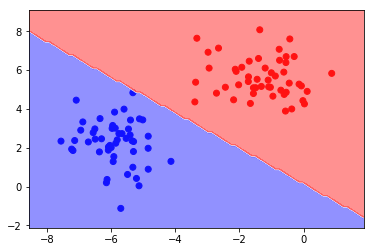

In [25]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(51):
    y_pred = np.dot(x, w.T) + b 
    y_pred = np.where(y_pred > 0, 1, 0)
    error = y - y_pred
    w = w + learning_rate*np.dot(error.T, x)
    b = b + learning_rate*np.sum(error)
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, np.sum(error)))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

### Keras

In [8]:
D = x.shape[1]

model4 = Sequential()
model4.add(Dense(units=1, activation='linear', input_dim=D))
model4.compile(loss='categorical_hinge', optimizer='sgd')

0.0170076340437
[[ 0.49782327]
 [ 0.4945958 ]] [-0.17679995]


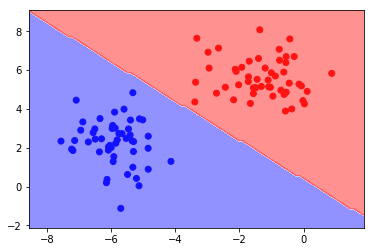

In [9]:
model4.fit(x, y, epochs=100, batch_size=x.shape[0], verbose=0)
y_pred = model4.predict(x, verbose=0)
error = model4.evaluate(x, y, batch_size=x.shape[0], verbose=0)
w, b = model4.get_weights()
print(error)
print(w,b)

plot_linear_classifier(x, y, w.reshape(1, 2), b)

### Tensorflow

In [26]:
D = x.shape[1]

learning_rate = 1e-2

tf.reset_default_graph()

graph = tf.Graph()
with graph.as_default():
    tf_x = tf.constant(x, dtype=tf.float64)
    tf_y = tf.constant(y, dtype=tf.float64)
    
    tf_w = tf.Variable(tf.random_uniform(shape=(1, D), minval=-1, maxval=1, dtype=tf.float64))
    tf_b = tf.Variable(tf.random_uniform(shape=(1,), minval=-1, maxval=1, dtype=tf.float64))
    
    y_pred = tf.add(tf.matmul(tf_x, tf_w, transpose_b=True), tf_b)
    y_pred_bin = tf.where(y_pred > 0, tf.ones_like(y_pred), tf.zeros_like(y_pred))
    error = tf.subtract(tf_y, y_pred_bin)
    
    loss = tf.reduce_sum(error)
    
    delta = tf.matmul(error, tf_x, transpose_a=True)
    train_w = tf.assign(tf_w, tf.add(tf_w, learning_rate*delta))
    train_b = tf.assign(tf_b, tf.add(tf_b, learning_rate*loss))

step 0: 2.0
step 5: 0.0
step 10: 0.0
step 15: 0.0
step 20: 0.0
step 25: 0.0
step 30: 0.0
step 35: 0.0
step 40: 0.0
step 45: 0.0
step 50: 0.0
0.0
[[ 0.80070012  0.73252707]] [-0.31059973]


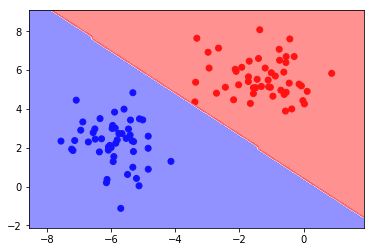

In [27]:
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(51):
        erro, _, _ = sess.run([loss, train_w, train_b])
        
        if step%5 == 0:
            print('step {0}: {1}'.format(step, erro))
    
    print(erro)
    print(tf_w.eval(), tf_b.eval())
    plot_linear_classifier(x, y, tf_w.eval(), tf_b.eval())